# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings("ignore")

data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [2]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
features_1 = data_1.drop(['id', 'product'], axis=1)
target_1 = data_1['product']
features_2 = data_2.drop(['id', 'product'], axis=1)
target_2 = data_2['product']
features_3 = data_3.drop(['id', 'product'], axis=1)
target_3 = data_3['product']

Данные загружены. Пропусков в данных нет. Форматы колонок со значениями для обучения моделей имеют формат float. 

## Обучение и проверка модели

In [6]:
features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1, target_1, 
                                                                                     test_size = 0.25, random_state=12345)
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2, target_2, 
                                                                                     test_size = 0.25, random_state=12345)
features_3_train, features_3_valid, target_3_train, target_3_valid = train_test_split(features_3, target_3, 
                                                                                     test_size = 0.25, random_state=12345)

In [7]:
model_1 = LinearRegression(n_jobs=-1)
model_2 = LinearRegression(n_jobs=-1)
model_3 = LinearRegression(n_jobs=-1)

model_1.fit(features_1_train, target_1_train)
model_2.fit(features_2_train, target_2_train)
model_3.fit(features_3_train, target_3_train)

predict_valid_1 = model_1.predict(features_1_valid)
predict_valid_2 = model_2.predict(features_2_valid)
predict_valid_3 = model_3.predict(features_3_valid)

In [8]:
predict_valid_1 = pd.Series(predict_valid_1)
predict_valid_2 = pd.Series(predict_valid_2)
predict_valid_3 = pd.Series(predict_valid_3)

In [9]:
print('Средний предсказанный объем сырья в 1 скважине в 1-м регионе, тыс. баррелей:',predict_valid_1.mean())
print('Средний предсказанный объем сырья в 1 скважине в 2-м регионе, тыс. баррелей:',predict_valid_2.mean())
print('Средний предсказанный объем сырья в 1 скважине в 3-м регионе, тыс. баррелей:',predict_valid_3.mean())

Средний предсказанный объем сырья в 1 скважине в 1-м регионе, тыс. баррелей: 92.59256778438035
Средний предсказанный объем сырья в 1 скважине в 2-м регионе, тыс. баррелей: 68.728546895446
Средний предсказанный объем сырья в 1 скважине в 3-м регионе, тыс. баррелей: 94.96504596800489


(array([1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 1.200e+01, 3.700e+01,
        7.500e+01, 1.550e+02, 3.360e+02, 5.560e+02, 8.590e+02, 1.303e+03,
        1.637e+03, 2.120e+03, 2.376e+03, 2.642e+03, 2.670e+03, 2.493e+03,
        2.197e+03, 1.839e+03, 1.381e+03, 9.370e+02, 6.130e+02, 3.640e+02,
        1.990e+02, 1.110e+02, 5.100e+01, 1.900e+01, 8.000e+00, 4.000e+00]),
 array([ -9.36784638,  -3.04956106,   3.26872425,   9.58700957,
         15.90529488,  22.22358019,  28.54186551,  34.86015082,
         41.17843614,  47.49672145,  53.81500677,  60.13329208,
         66.4515774 ,  72.76986271,  79.08814803,  85.40643334,
         91.72471866,  98.04300397, 104.36128929, 110.6795746 ,
        116.99785991, 123.31614523, 129.63443054, 135.95271586,
        142.27100117, 148.58928649, 154.9075718 , 161.22585712,
        167.54414243, 173.86242775, 180.18071306]),
 <BarContainer object of 30 artists>)

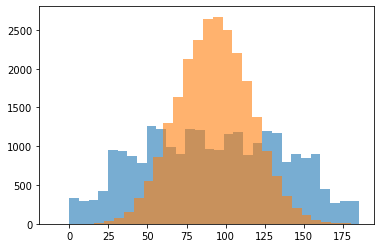

In [28]:
plt.hist(target_1_valid, bins=30, alpha=0.6)
plt.hist(predict_valid_1, bins=30, alpha=0.6)

(array([4360., 5500., 5437., 5351., 4352.]),
 array([ -1.89377434,  26.44877449,  54.79132332,  83.13387215,
        111.47642098, 139.81896981]),
 <BarContainer object of 5 artists>)

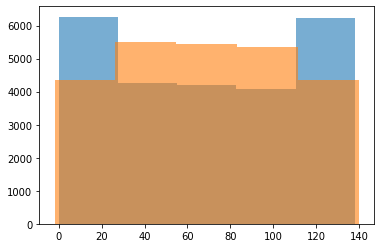

In [35]:
plt.hist(target_2_valid, bins=5, alpha=0.6)
plt.hist(predict_valid_2, bins=5, alpha=0.6)

(array([   4.,    3.,    6.,   18.,   56.,  110.,  174.,  286.,  500.,
         808., 1092., 1452., 1820., 2108., 2367., 2370., 2473., 2272.,
        1920., 1578., 1239.,  891.,  619.,  369.,  220.,  138.,   63.,
          23.,   14.,    7.]),
 array([ 17.13159749,  22.08910535,  27.04661321,  32.00412106,
         36.96162892,  41.91913677,  46.87664463,  51.83415249,
         56.79166034,  61.7491682 ,  66.70667605,  71.66418391,
         76.62169177,  81.57919962,  86.53670748,  91.49421533,
         96.45172319, 101.40923105, 106.3667389 , 111.32424676,
        116.28175461, 121.23926247, 126.19677033, 131.15427818,
        136.11178604, 141.06929389, 146.02680175, 150.98430961,
        155.94181746, 160.89932532, 165.85683317]),
 <BarContainer object of 30 artists>)

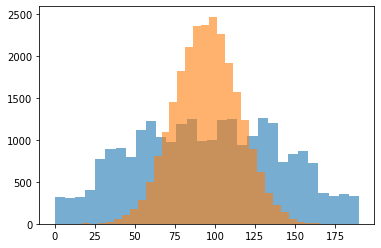

In [36]:
plt.hist(target_3_valid, bins=30, alpha=0.6)
plt.hist(predict_valid_3, bins=30, alpha=0.6)

In [12]:
rms_1 = mean_squared_error(target_1_valid, predict_valid_1, squared=False)
rms_2 = mean_squared_error(target_2_valid, predict_valid_2, squared=False)
rms_3 = mean_squared_error(target_3_valid, predict_valid_3, squared=False)

In [13]:
print('Среднеквадратичная ошибка (RMSE) 1-м регионе, тыс. баррелей:',rms_1)
print('Среднеквадратичная ошибка (RMSE) 2-м регионе, тыс. баррелей:',rms_2)
print('Среднеквадратичная ошибка (RMSE) 3-м регионе, тыс. баррелей:',rms_3)

Среднеквадратичная ошибка (RMSE) 1-м регионе, тыс. баррелей: 37.5794217150813
Среднеквадратичная ошибка (RMSE) 2-м регионе, тыс. баррелей: 0.893099286775617
Среднеквадратичная ошибка (RMSE) 3-м регионе, тыс. баррелей: 40.02970873393434


Мы выделили тестовые и валидационные выборки для каждого из регионов, обучили модели линейной регрессии и составили предсказания добычи на валидационных данных, расчитали средний объем запасов в 1 скважине в каждом из регионов и среднеквадратичныу ошибку предсказания модели для каждого из регионов). Среднеквадратичная ошибка предсказаний в 1 и 3 регионе составляет почти 1/3 от средних предсказанных объемов 1 скважины.

## Подготовка к расчёту прибыли

расчитаем пороговое значение запасов в 1 скважине для безубыточной разработки исходя из 200 скважин планируемых к разработке и прибыли от добычи 1 тыс. баррелей в 450 тыс. руб.

In [15]:
TOTAL_EXPENSES = 10000000000
QTY_WELL = 200
PROFIT_PER_THOUS_BARELL = 450000
SIZE_TO_SEARCH = 500

In [16]:
threshold_value_break_even = TOTAL_EXPENSES/QTY_WELL/PROFIT_PER_THOUS_BARELL
print('Среднее пороговое значение запасов месторождения для безубыточной его разработки, тыс. бар.:',threshold_value_break_even)

Среднее пороговое значение запасов месторождения для безубыточной его разработки, тыс. бар.: 111.11111111111111


сравним пороговое значение запасов в 1 скважине со средним значением запасов в 1 скважине в каждом из регионов

In [17]:
print('Сравнение среднего предсказанного объема и объема для безубыточной добычи Регион 1, тыс. бар.:',
      target_1.mean() - threshold_value_break_even)
print('Сравнение среднего предсказанного объема и объема для безубыточной добычи Регион 2, тыс. бар.:', 
      target_2.mean() - threshold_value_break_even)
print('Сравнение среднего предсказанного объема и объема для безубыточной добычи Регион 3, тыс. бар.:',
      target_3.mean() - threshold_value_break_even)

Сравнение среднего предсказанного объема и объема для безубыточной добычи Регион 1, тыс. бар.: -18.6111111111111
Сравнение среднего предсказанного объема и объема для безубыточной добычи Регион 2, тыс. бар.: -42.2861111111111
Сравнение среднего предсказанного объема и объема для безубыточной добычи Регион 3, тыс. бар.: -16.11111111111107


Мы выявили, что 1 скважина положительно рентабельна при запасах нефти в 111 тыс. баррелей. (при условии разработки 200 скважин, при прибыльности добычи 1 тыс. баррелей  , средние показатели запасов в 1 скважине в регионах меньше чем вышеуказанный показатель в Регионе 1 на 19 тыс. баррелей, в Регионе 2 на 42 тыс. баррелей., в Регионе 3 на 16 тыс. баррелей.

In [18]:
def max_reserve_find (target, predict, qty_well, total_expenses, profit_per_thous_barell):
    predict_sorted = predict.sort_values(ascending=False)[:qty_well]
    target_sorted = target.iloc[predict_sorted.index]
    return (target_sorted.sum()*profit_per_thous_barell-total_expenses)

Мы подготовили функцию для отбора 200 максимальных значений по размерам запасов нефти и расчету прибыли от их разработки.

## Расчёт прибыли и рисков 

Нижняя граница доверительного интервала -111215.55 тыс. руб.  Верхняя граница доверительного интервала 909766.94 тыс. руб.
Среднее значение прибыли 396164.98 тыс. руб.
Вероятность получения убытка от разработки предсказанных скважин 6.855%
Вероятность получения убытка от разработки предсказанных скважин 6.900%


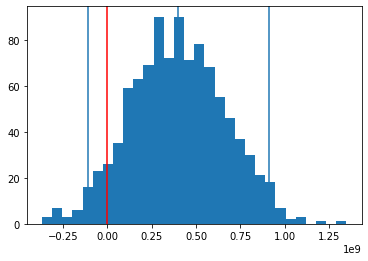

In [19]:
random_state = np.random.RandomState(12345)
values=[]
for i in range (1000):
    sample_reserve = predict_valid_1.sample(n=SIZE_TO_SEARCH, replace=True, random_state=random_state)
    values.append(max_reserve_find(target_1_valid, sample_reserve, QTY_WELL, TOTAL_EXPENSES, PROFIT_PER_THOUS_BARELL))

values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)
values_std = np.std(values)
zero_profit=st.norm(values.mean(), values_std).cdf(0)


print('Нижняя граница доверительного интервала {:.2f} тыс. руб.  Верхняя граница доверительного интервала {:.2f} тыс. руб.'
      .format(lower/1000,upper/1000))
print('Среднее значение прибыли {:.2f} тыс. руб.'.format(values.mean()/1000))
print('Вероятность получения убытка от разработки предсказанных скважин {:.3%}'.format(zero_profit))
print('Вероятность получения убытка от разработки предсказанных скважин {:.3%}'.format((values<=0).mean()))

fig, ax = plt.subplots()
plt.hist(values, bins=30)
plt.axvline(lower)
plt.axvline(upper)
plt.axvline(values.mean())
plt.axvline(zero_profit, color = 'red')

In [20]:
values.sort_values(ascending = True)

445   -3.695671e+08
502   -3.247521e+08
465   -3.171276e+08
938   -3.046120e+08
217   -2.995066e+08
           ...     
768    1.076333e+09
373    1.093074e+09
415    1.097962e+09
662    1.180922e+09
140    1.349267e+09
Length: 1000, dtype: float64

Нижняя граница доверительного интервала 33820.51 тыс. руб.  Верхняя граница доверительного интервала 852289.45 тыс. руб.
Среднее значение прибыли 456045.11 тыс. руб.
Вероятность получения убытка от разработки предсказанных скважин 1.407%
Вероятность получения убытка от разработки предсказанных скважин 1.500%


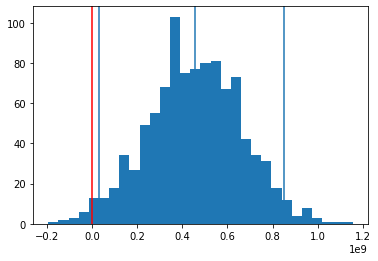

In [21]:
random_state = np.random.RandomState(12345)
values=[]
for i in range (1000):
    sample_reserve = predict_valid_2.sample(n=SIZE_TO_SEARCH, replace=True, random_state=random_state)
    values.append(max_reserve_find(target_2_valid, sample_reserve, QTY_WELL, TOTAL_EXPENSES, PROFIT_PER_THOUS_BARELL))


values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)
values_std = np.std(values)
zero_profit=st.norm(values.mean(), values_std).cdf(0)
print('Нижняя граница доверительного интервала {:.2f} тыс. руб.  Верхняя граница доверительного интервала {:.2f} тыс. руб.'
      .format(lower/1000,upper/1000))
print('Среднее значение прибыли {:.2f} тыс. руб.'.format(values.mean()/1000))
print('Вероятность получения убытка от разработки предсказанных скважин {:.3%}'.format(zero_profit))
print('Вероятность получения убытка от разработки предсказанных скважин {:.3%}'.format((values<=0).mean()))
fig, ax = plt.subplots()
plt.hist(values, bins=30)
plt.axvline(lower)
plt.axvline(upper)
plt.axvline(values.mean())
plt.axvline(zero_profit, color = 'red')

Нижняя граница доверительного интервала -163350.41 тыс. руб.  Верхняя граница доверительного интервала 950359.57 тыс. руб.
Среднее значение прибыли 404403.87 тыс. руб.
Вероятность получения убытка от разработки предсказанных скважин 6.936%
Вероятность получения убытка от разработки предсказанных скважин 7.600%


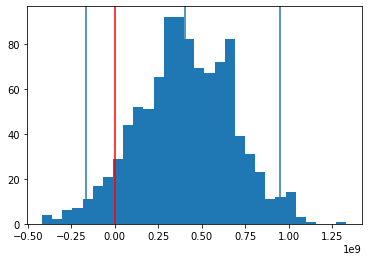

In [22]:
random_state = np.random.RandomState(12345)
values=[]
for i in range (1000):
    sample_reserve = predict_valid_3.sample(n=SIZE_TO_SEARCH, replace=True, random_state=random_state)
    values.append(max_reserve_find(target_3_valid, sample_reserve, QTY_WELL, TOTAL_EXPENSES, PROFIT_PER_THOUS_BARELL))
    
values = pd.Series(values)
lower = values.quantile(0.025)
upper = values.quantile(0.975)
values_std = np.std(values)
zero_profit=st.norm(values.mean(), values_std).cdf(0)
print('Нижняя граница доверительного интервала {:.2f} тыс. руб.  Верхняя граница доверительного интервала {:.2f} тыс. руб.'
      .format(lower/1000,upper/1000))
print('Среднее значение прибыли {:.2f} тыс. руб.'.format(values.mean()/1000))
print('Вероятность получения убытка от разработки предсказанных скважин {:.3%}'.format(zero_profit))
print('Вероятность получения убытка от разработки предсказанных скважин {:.3%}'.format((values<=0).mean()))

fig, ax = plt.subplots()
plt.hist(values, bins=30)
plt.axvline(lower)
plt.axvline(upper)
plt.axvline(values.mean())
plt.axvline(zero_profit, color = 'red')

Для дальнейшей разработки месторождений выберем регион 2 с учетом того, что вероятность убытков при разработке данного региона составляет 1 % вместо 7 % в регионе 1 и регионе 3.Пороговое значение вероятности убытка 2,5 %.

Выводы по проекту:<br>
1.Получены данные о важных параметрах и запасах нефти в разных точках бурения. Данные разделены на обучающую и валидационную выборку. На вышеуказанных данных обучены и сделаны предсказания модели линейной регрессии. <br>
2.Получены средние предсказанные объемы запасов нефти в регионах (регион 1 - 93 тыс. баррелей., регион 2 - 69 тыс. баррелей, регион 3 - 96 тыс.баррелей) и среднеквадратичные ошибки (RMSE) в предсказаний модели(регион 1 - 38 тыс. баррелей, регион 2 - 1 тыс. баррелей, регион 3 - 40 тыс. баррелей). <br>
3.Рассчитано пороговое значение безубыточной добычи нефти из 200 месторождений при учете прибыли 450 тыс. руб/1тыс. баррелей оно составило 111 тыс. баррелей. Средние значения предсказанные моделями меньше безубыточного порога от добычи регион 1 - 19 тыс. баррелей, регион 2 - 42 тыс. баррелей, регион 3 - 16 тыс. баррелей. Подготовлена функция расчета прибыли от разработки 200 максимальных по объему предсказанных запасов месторождений.<br>
4.Для данных о фактических объемов запасов регионов (отобранных в соответствии с предсказаниями модели о размерах запасов) проведена процедура Bootstrap. Получены следующие результаты. Регион 1: НГДИ - убыток 111 216 тыс. руб. ВГДИ - 909 767 руб. средняя прибыль - 396 165 тыс. руб.; Регион 2 - НГДИ - 33 820 тыс. руб. ВГДИ - 852 289 руб. средняя прибыль - 456 045 тыс. руб.; Регион 3 - НГДИ - убыток 163 350 тыс. руб. ВГДИ - 950 360 руб. средняя прибыль - 404 404 тыс. руб.<br>
5.Для разработки месторождений предлагается выбрать Регион 2, так как вероятность убытков (1 %) в этом регионе меньше чем заданный порог в 2,5 %.